[*********************100%***********************]  5 of 5 completed


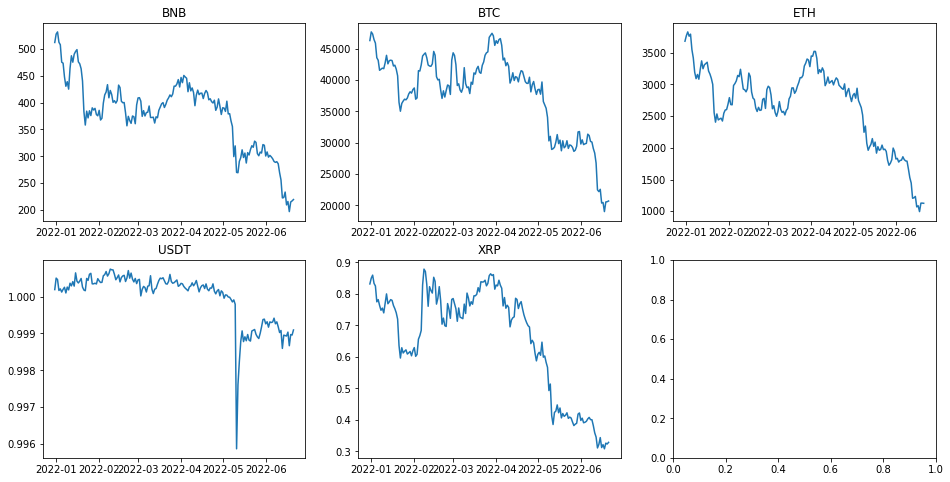

In [5]:
#stock data for discord bot to send to user

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cryptocurrencies = ["BTC-USD", "ETH-USD","BNB-USD", "XRP-USD","USDT-USD" ]
crydata = yf.download(cryptocurrencies, start = '2021-12-31', end = '2022-06-21')

crydata.head()
cry_adjClose = crydata['Adj Close']
cry_adjClose.head()



fig, axis = plt.subplots( 2,3, figsize = (16,8), gridspec_kw= {'hspace':0.2, 'wspace': 0.2})
axis[0,0].plot(cry_adjClose['BNB-USD'])
axis[0,0].set_title('BNB')

axis[0,1].plot(cry_adjClose['BTC-USD'])
axis[0,1].set_title('BTC')

axis[0,2].plot(cry_adjClose['ETH-USD'])
axis[0,2].set_title('ETH')

axis[1,0].plot(cry_adjClose['USDT-USD'])
axis[1,0].set_title('USDT')

axis[1,1].plot(cry_adjClose['XRP-USD'])
axis[1,1].set_title('XRP')
overview = plt.show
plt.savefig("overview.jpg")

[*********************100%***********************]  2 of 2 completed


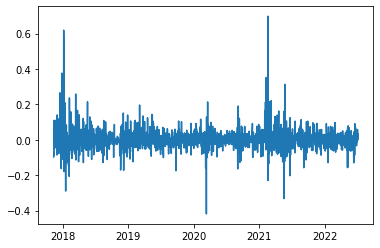

In [6]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

now = datetime.now()
removeYear = now.year - 10
current_date = datetime.today().strftime('%Y-%m-%d')
date_arr = current_date.split('-')
past = str(removeYear) + '-' + date_arr[1] + '-' + date_arr[2]

crypto = ['BTC-USD', 'BNB-USD']
crydata1 = yf.download(crypto, start = past, end = now)
cry_adjclose = crydata1['Adj Close']

returns = cry_adjclose.pct_change().dropna(axis = 0)
plt.plot(returns["BNB-USD"])


In [7]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

now = datetime.now()
removeYear = now.year - 10
current_date = datetime.today().strftime('%Y-%m-%d')
date_arr = current_date.split('-')
past = str(removeYear) + '-' + date_arr[1] + '-' + date_arr[2]

crypto = ['BTC-USD', 'BNB-USD']
crydata1 = yf.download(crypto, start = past, end = now)
cry_adjclose = crydata1['Adj Close']


returns = cry_adjclose.pct_change().dropna(axis = 0)
    
returns.head()   

[*********************100%***********************]  2 of 2 completed


,BNB-USD,BTC-USD
Date,,
2017-11-10,-0.097415,-0.073554
2017-11-11,-0.070329,-0.039368
2017-11-12,-0.090262,-0.064101
2017-11-13,0.109845,0.102422
2017-11-14,-0.055757,0.011626


In [ ]:
import os
import discord
from discord.ext import commands
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
from datetime import datetime
from yahooquery import Screener
import yahoo_fin.stock_info as si

s = Screener()
data = s.get_screeners('all_cryptocurrencies_us', count=200)

dicts = data['all_cryptocurrencies_us']['quotes']
symbols = [d['symbol'] for d in dicts]
symbols

crydata = yf.download(symbols, start = past, end = now)
cry_adjclose = crydata['Adj Close']
now = datetime.now()
removeYear = now.year - 10
current_date = datetime.today().strftime('%Y-%m-%d')
date_arr = current_date.split('-')
past = str(removeYear) + '-' + date_arr[1] + '-' + date_arr[2]

def generate_heatmap(first, second, third, fourth):
    heat = [first, second, third, fourth]
    if first and second and third and fourth in symbols:
        heat_data = yf.download(heat, start = past, end =now)
        heat_corr = (((1 + heat_data['Adj Close'].pct_change()).cumprod() - 1) * 100).corr()
        sns.heatmap(heat_corr, annot = True, cmap = 'coolwarm')
        

generate_heatmap("BNB-USD", "ETH-USD", "BTC-USD", "XRP-USD")

